In [2]:
"""
This code is designed to plot the star formation rate vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os

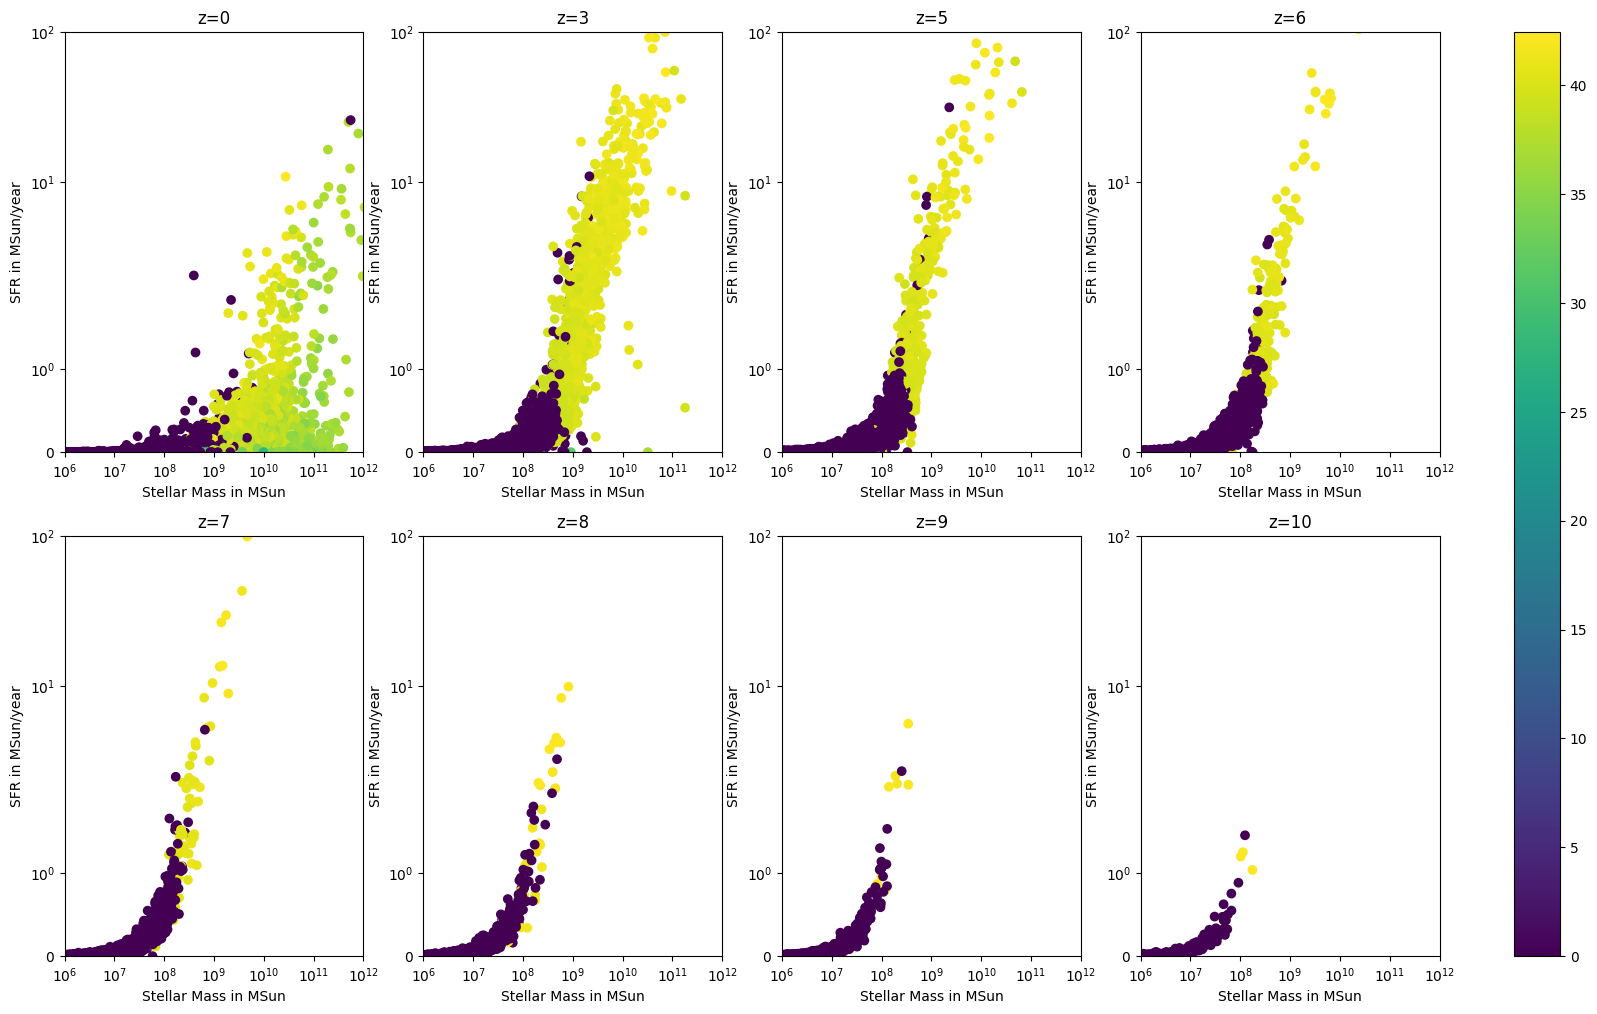

In [12]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    lum = df['XrayLum'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    """ 
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        lum = np.delete(lum, np.where(zero_rows)[0])
    """
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, sfr, c=lum)
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    axes[i][j].set_xlim([10**6, 10**12])
    axes[i][j].set_ylim([0, 10**2])
    axes[i][j].set_ylabel(r'SFR in MSun/year')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

fig.colorbar(pcm, ax=axes)
#fig.tight_layout()
fig.subplots_adjust(right=0.75)
plt.savefig('Figures/stellarMass_vs_sfr_tng50')
plt.show()

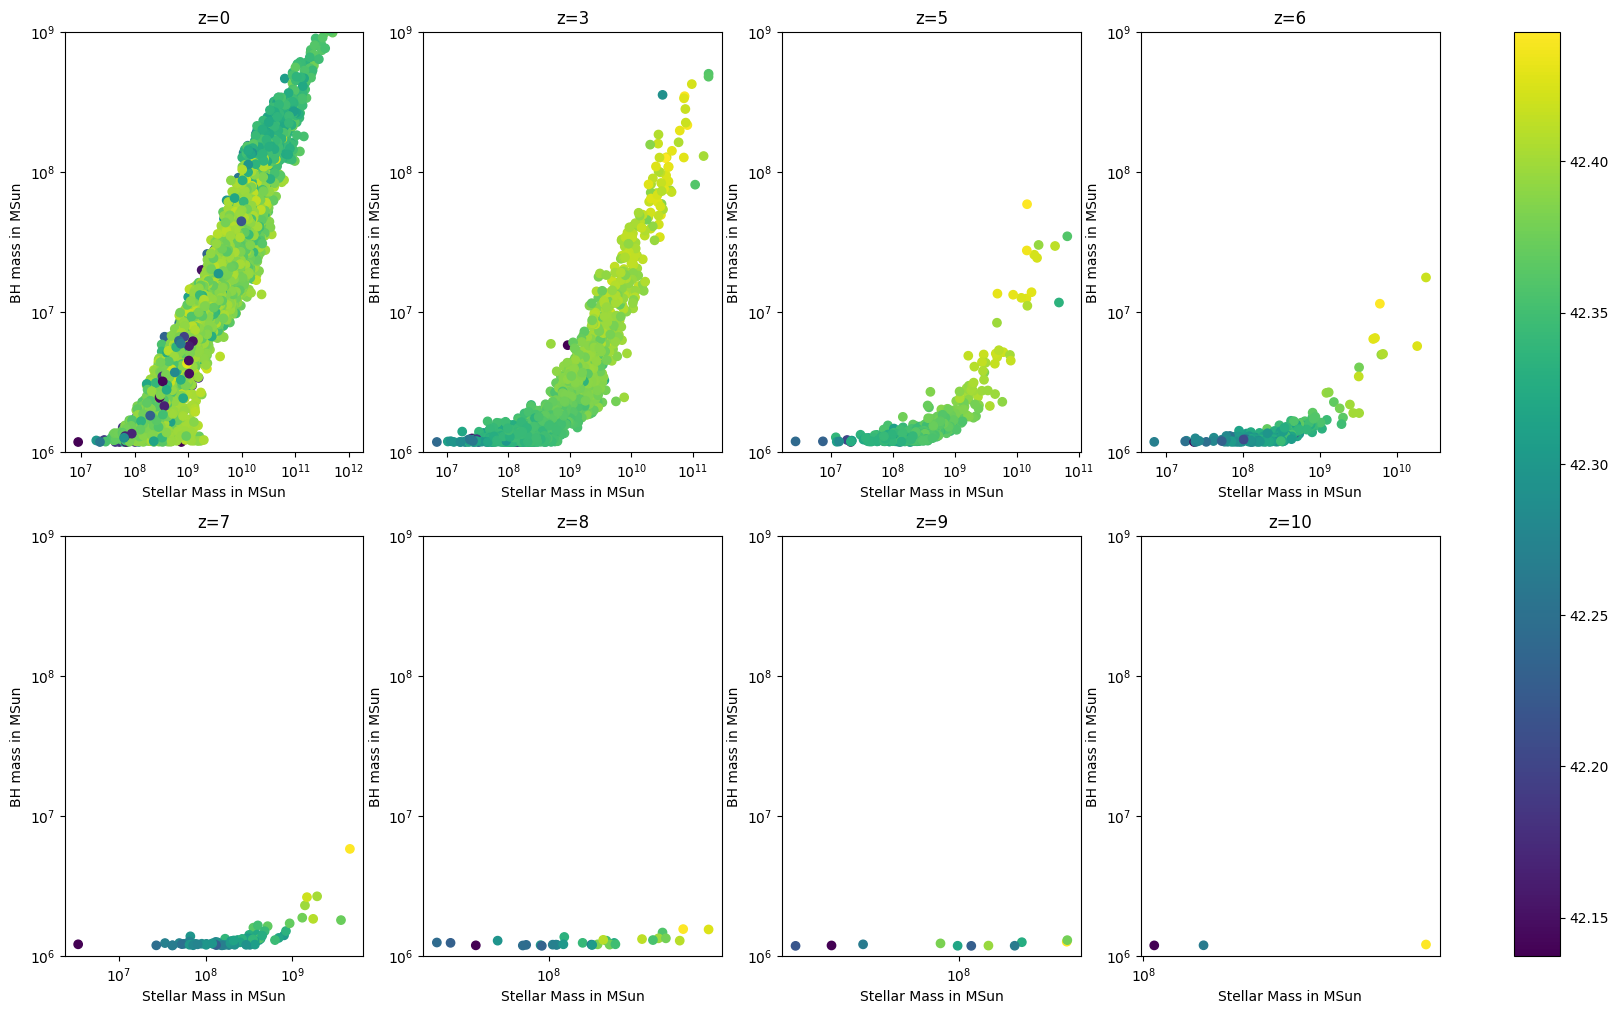

In [21]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['massBH'].to_numpy()
    lum = df['XrayLum'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        lum = np.delete(lum, np.where(zero_rows)[0])
    
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, sfr, c=lum)
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    #axes[i][j].set_xlim([10**6, 10**12])
    axes[i][j].set_ylim([10**6, 10**9])
    axes[i][j].set_ylabel(r'BH mass in MSun')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

fig.colorbar(pcm, ax=axes)
#fig.tight_layout()
fig.subplots_adjust(right=0.75)
plt.savefig('Figures/stellarMass_vs_bhMass_tng50')
plt.show()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.7713211053233522e+42
[[0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [3.00000000e+00 1.29174774e-02 1.92372398e-02 9.37724008e-03
  2.99018389e-02]
 [5.00000000e+00 2.27638447e-03 4.10141685e-03 1.21668825e-03
  1.06558342e-02]
 [6.00000000e+00 9.41828255e-04 2.46537396e-03 4.15512465e-04
  6.17728532e-03]
 [7.00000000e+00 4.28228845e-04 8.56457691e-04 2.14114423e-04
  3.38300788e-03]
 [8.00000000e+00 6.97885407e-05 6.28096866e-04 0.00000000e+00
  2.09365622e-03]
 [9.00000000e+00 0.00000000e+00 1.18539592e-04 0.00000000e+00
  1.06685633e-03]
 [1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.25521268e-04]]


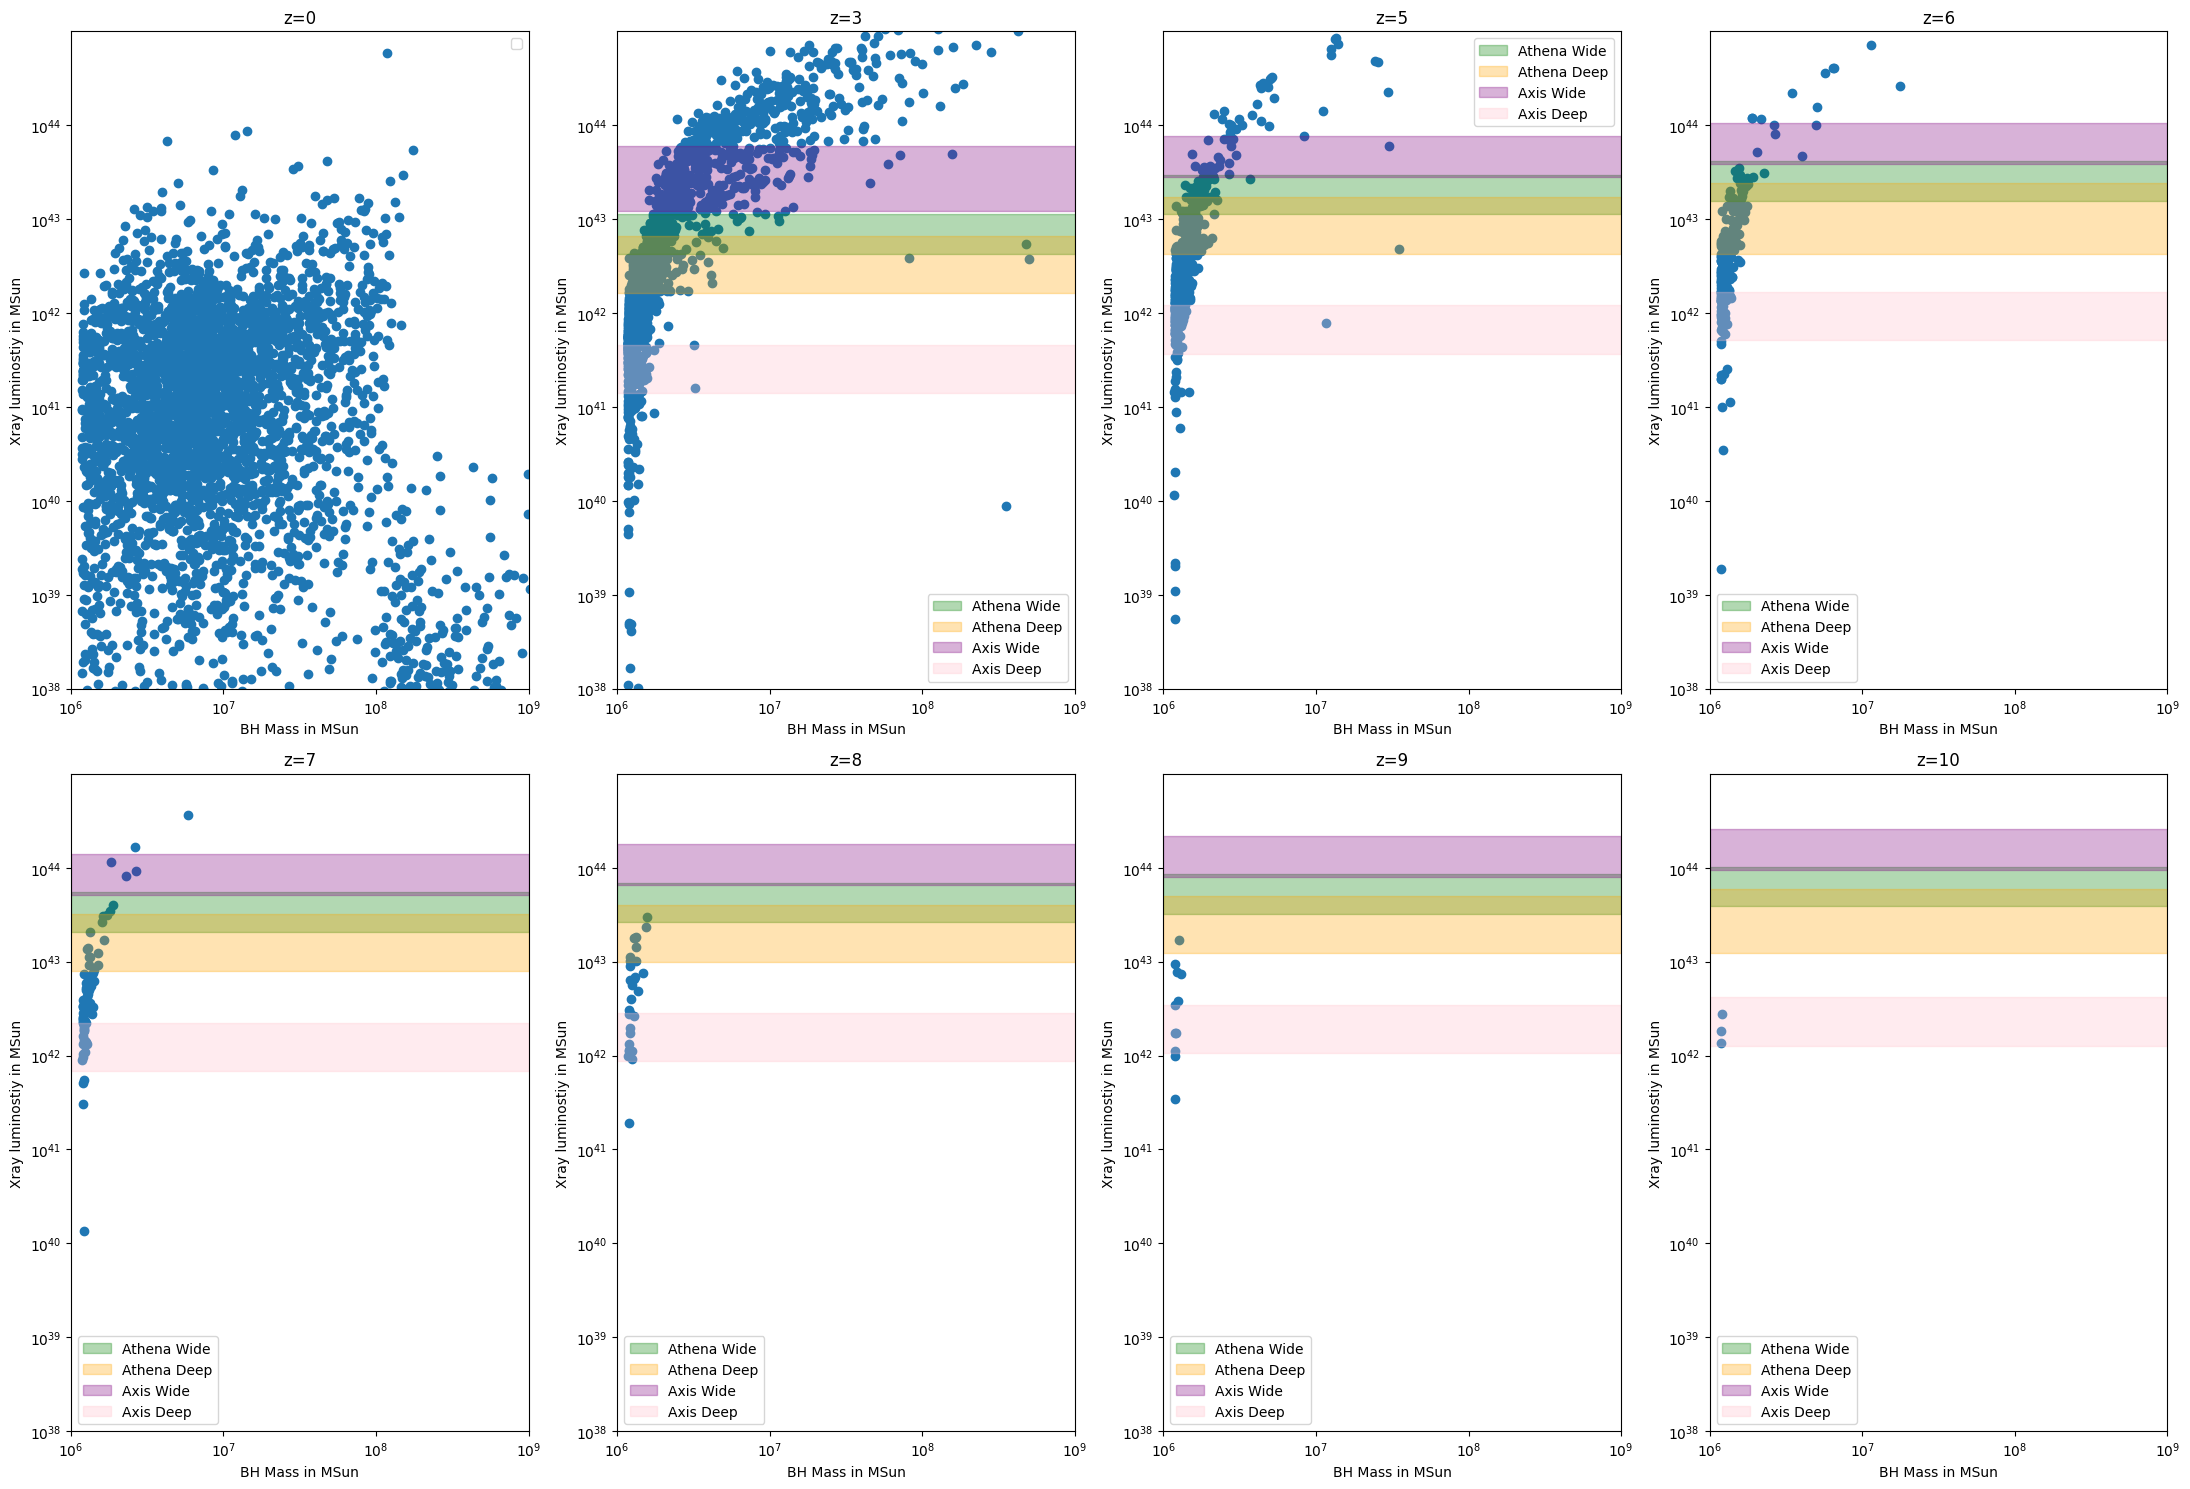

In [21]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
redshift = np.array([0,3,5,6,7,8,9,10])
athena_wide_lower = [0, 4.28885980721e+42,1.12985384708e+43,1.5762108588e+43,2.08015002867e+43,
               2.63514469431e+43,3.23853684955e+43,3.8867721315e+43]
athena_deep_lower = [0,1.62350175723e+42,4.27694023262e+42,4.27694023262e+42,7.8741842323e+42,
               9.97505685447e+42,1.22591329688e+43,1.22591329688e+43]
axis_wide_lower = [0,1.22591329688e+43,2.777345264133678e+43,3.8745557890184457e+43,5.113311642675746e+43,
              6.477569338687406e+43,7.960795110842346e+43, 9.554251817674262e+43]
axis_deep_lower = [0,1.4059567933326986e+41,3.7038414944418256e+41,5.16707111975603e+41,6.81906426281589e+41,
              8.638425481189919e+41,1.061644140577702e+42,1.274146026698138e+42]
athena_wide_upper = [0,1.13298312194e+43,2.98472180614e+43,4.16385794807e+43,5.49510820947e+43,
                     6.96123118204e+43,8.55520524163e+43,1.02676408691e+44]
athena_deep_upper = [0,6.60445762771e+42,1.73987311173e+43,2.4272226879e+43,3.2032435988e+43,
                     4.05788537252e+43,4.98705491904e+43,5.98527883982e+43]
axis_wide_upper = [0,5.98527883982e+43,7.6056820386805635e+43,1.0610362259585823e+44,1.4002660389797069e+44,
                   1.773864179213963e+44,2.180041393126391e+44,2.616405039053823e+44]
axis_deep_upper = [0,4.608820749903397e+41,1.2141441056288032e+42,1.69380059941308e+42,2.235335041476887e+42,
                   2.8317338621643685e+42,3.4801407605916625e+42,4.176736208467363e+42]
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
data_out = np.zeros((len(snapshot_num),5))
print(data_out)
fig, axes = plt.subplots(rows, cols, figsize=(22, 15))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['XrayLum'] = 10**(df['XrayLum'])
    #lum = df['XrayLum'].to_numpy()
    stellar_mass = df['massBH'].to_numpy()
    sfr = df['XrayLum'].to_numpy()
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        #lum = np.delete(lum, np.where(zero_rows)[0])
    
    total_AGN = len(sfr)
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log')
    
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log')
    pcm = axes[i][j].scatter(stellar_mass, sfr)
    """if x >0:
        axes[i][j].hlines(athena_wide[x],xmin=10**6, xmax=10**9, label='Athena Wide', color='green')
        axes[i][j].hlines(athena_deep[x],xmin=10**6, xmax=10**9, label='Athena Deep', color='orange')
        axes[i][j].hlines(axis_wide[x],xmin=10**6, xmax=10**9, label='Axis Wide', color='purple')
        axes[i][j].hlines(axis_deep[x],xmin=10**6, xmax=10**9, label='Axis Deep', color='pink')
    """
    if x >0:
        axes[i][j].axhspan(athena_wide_lower[x],athena_wide_upper[x], label='Athena Wide', color='green', alpha=0.3)
        axes[i][j].axhspan(athena_deep_lower[x],athena_deep_upper[x], label='Athena Deep', color='orange', alpha=0.3)
        axes[i][j].axhspan(axis_wide_lower[x],axis_wide_upper[x], label='Axis Wide', color='purple', alpha=0.3)
        axes[i][j].axhspan(axis_deep_lower[x],axis_deep_upper[x], label='Axis Deep', color='pink', alpha=0.3)
    axes[i][j].set_xlabel(r'BH Mass in MSun')
    axes[i][j].set_xlim([10**6, 10**9])
    axes[i][j].set_ylim([1e+38, 1e+45])
    axes[i][j].set_ylabel(r'Xray luminostiy in MSun')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    axes[i][j].legend()

    data_out[x][0] = redshift[x]
    data_out[x][1] = len(np.where(sfr>athena_wide_lower[x])[0])/total_AGN
    data_out[x][2] = len(np.where(sfr>athena_deep_lower[x])[0])/total_AGN
    data_out[x][3] = len(np.where(sfr>axis_wide_lower[x])[0])/total_AGN
    data_out[x][4] = len(np.where(sfr>axis_deep_lower[x])[0])/total_AGN

    if x == 7:
        print(max(sfr))

    

    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
print(data_out)
df2 = pd.DataFrame(data_out,
                   columns=['redshift', 'athena_wide_lower', 'athena_deep_lower', 'axis_wide_lower','axis_deep_lower'])
    
df2.to_csv('agn_numberDensity.csv')
#fig.colorbar(pcm, ax=axes)
fig.tight_layout()
#fig.subplots_adjust(right=0.75)
plt.savefig('Figures/luminosity_vs_bhMass_tng50')
plt.show()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[   0    1    2 ... 4046 4047 4048]
[   0    1    2 ... 4046 4047 4048]
[   0    1    2 ... 4046 4047 4048]
[   0    1    2 ... 4046 4047 4048]
[   0    1    2    3    4    5    6    7    9   10   11   12   17   20
   21   22   23   28   29   30   32   33   34   35   36   37   38   39
   40   41   42   43   45   46   47   48   49   50   51   52   54   55
   56   60   61   62   63   64   65   66   67   68   69   70   71   72
   73   74   75   76   78   79   81   82   83   84   86   87   88   90
   91   93   94   95   96   97   98   99  100  101  103  105  106  107
  108  109  110  111  113  114  115  116  117  119  120  121  122  125
  126  127  128  131  134  135  136  137  140  142  143  144  145  147
  148  149  151  152  156  157  159  160  161  162  164  165  166  167
  168  171  172  173  174  176  177  178  179  180  183  184  185  186
 

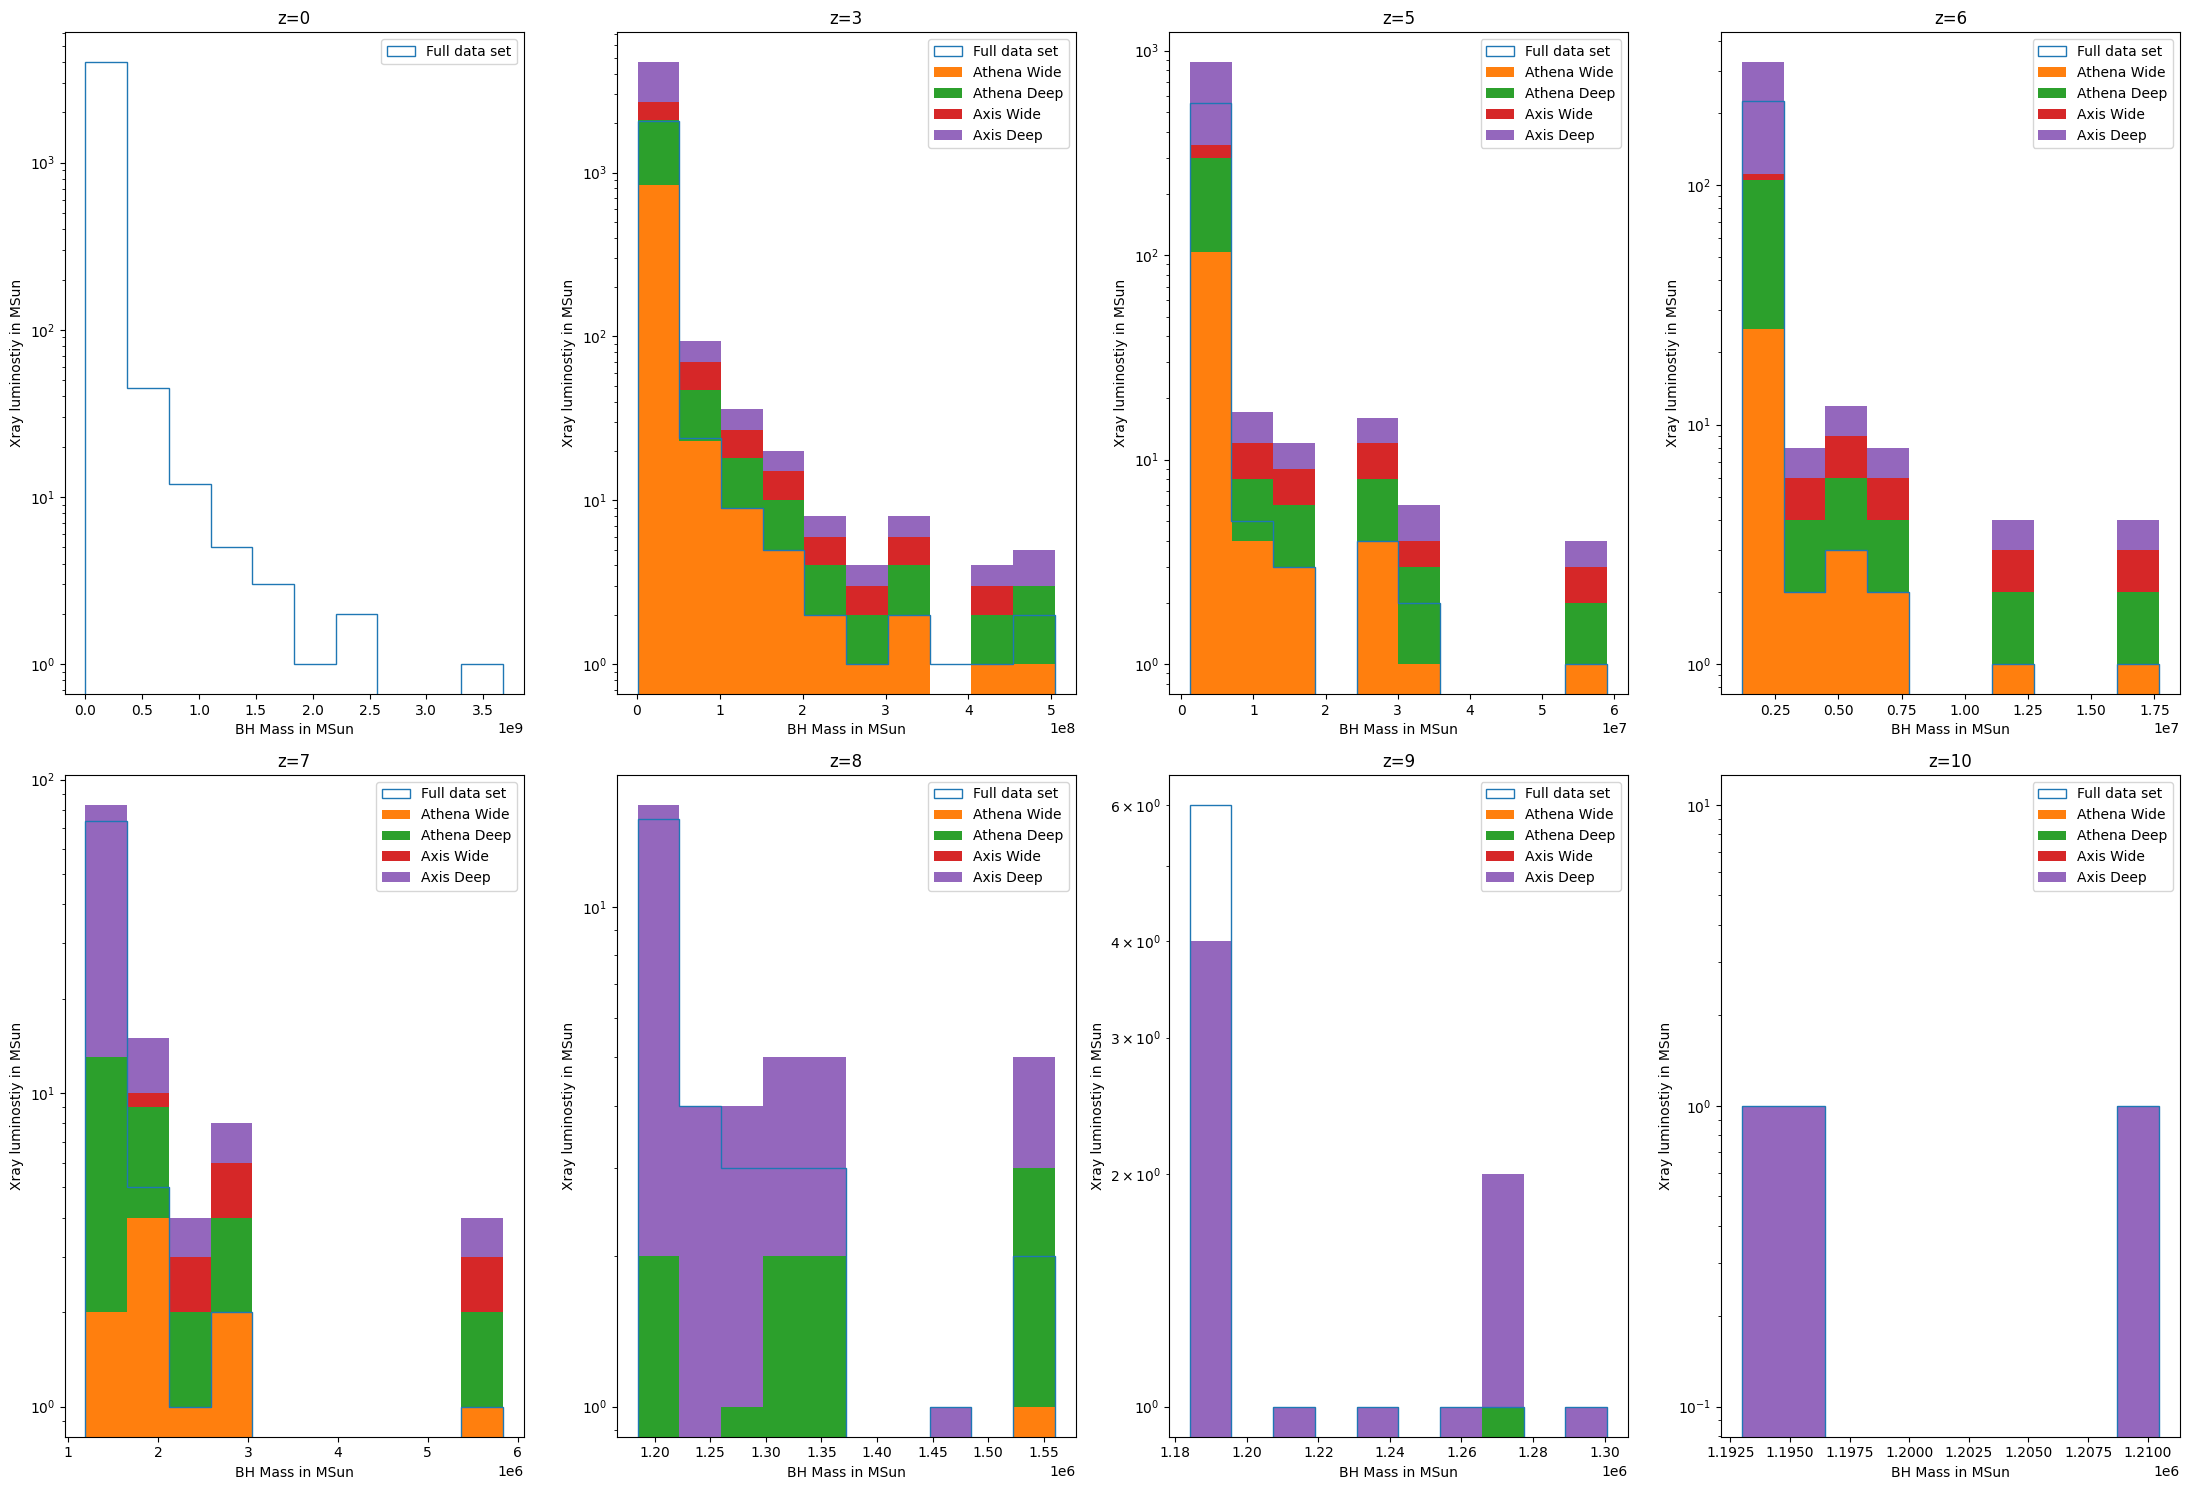

In [35]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
redshift = np.array([0,3,5,6,7,8,9,10])
athena_wide_lower = [0, 4.28885980721e+42,1.12985384708e+43,1.5762108588e+43,2.08015002867e+43,
               2.63514469431e+43,3.23853684955e+43,3.8867721315e+43]
athena_deep_lower = [0,1.62350175723e+42,4.27694023262e+42,4.27694023262e+42,7.8741842323e+42,
               9.97505685447e+42,1.22591329688e+43,1.22591329688e+43]
axis_wide_lower = [0,1.22591329688e+43,2.777345264133678e+43,3.8745557890184457e+43,5.113311642675746e+43,
              6.477569338687406e+43,7.960795110842346e+43, 9.554251817674262e+43]
axis_deep_lower = [0,1.4059567933326986e+41,3.7038414944418256e+41,5.16707111975603e+41,6.81906426281589e+41,
              8.638425481189919e+41,1.061644140577702e+42,1.274146026698138e+42]
athena_wide_upper = [0,1.13298312194e+43,2.98472180614e+43,4.16385794807e+43,5.49510820947e+43,
                     6.96123118204e+43,8.55520524163e+43,1.02676408691e+44]
athena_deep_upper = [0,6.60445762771e+42,1.73987311173e+43,2.4272226879e+43,3.2032435988e+43,
                     4.05788537252e+43,4.98705491904e+43,5.98527883982e+43]
axis_wide_upper = [0,5.98527883982e+43,7.6056820386805635e+43,1.0610362259585823e+44,1.4002660389797069e+44,
                   1.773864179213963e+44,2.180041393126391e+44,2.616405039053823e+44]
axis_deep_upper = [0,4.608820749903397e+41,1.2141441056288032e+42,1.69380059941308e+42,2.235335041476887e+42,
                   2.8317338621643685e+42,3.4801407605916625e+42,4.176736208467363e+42]
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
data_out = np.zeros((len(snapshot_num),5))
print(data_out)
fig, axes = plt.subplots(rows, cols, figsize=(22, 15))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['XrayLum'] = 10**(df['XrayLum'])
    #lum = df['XrayLum'].to_numpy()
    stellar_mass = df['massBH'].to_numpy()
    sfr = df['XrayLum'].to_numpy()
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (stellar_mass <= 0)

    
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        #lum = np.delete(lum, np.where(zero_rows)[0])
    
    print(np.where(sfr>athena_wide_lower[x])[0])
    print(np.where(sfr>athena_deep_lower[x])[0])
    print(np.where(sfr>axis_wide_lower[x])[0])
    print(np.where(sfr>axis_deep_lower[x])[0])
    
    if x >0:
        axes[i][j].hist([stellar_mass[np.where(sfr>athena_wide_lower[x])[0]],
                         stellar_mass[np.where(sfr>athena_deep_lower[x])[0]],
                         stellar_mass[np.where(sfr>axis_wide_lower[x])[0]],
                         stellar_mass[np.where(sfr>axis_deep_lower[x])[0]]], 
                         bins=10, log=True, label=['Athena Wide','Athena Deep','Axis Wide','Axis Deep'], stacked=True)


        #axes[i][j].hist(stellar_mass[np.where(sfr>athena_wide_lower[x])[0]], bins=10, log=True, label='Athena Wide', histtype='step', stacked=True, fill=False)
        #axes[i][j].hist(stellar_mass[np.where(sfr>athena_deep_lower[x])[0]], bins=10, log=True, label='Athena Deep', histtype='step', stacked=True, fill=False)
        #axes[i][j].hist(stellar_mass[np.where(sfr>axis_wide_lower[x])[0]], bins=10, log=True, label='Axis Wide', histtype='step', stacked=True, fill=False)
        #axes[i][j].hist(stellar_mass[np.where(sfr>axis_deep_lower[x])[0]], bins=10, log=True, label='Axis Deep', histtype='step', stacked=True, fill=False)
        
    axes[i][j].set_xlabel(r'BH Mass in MSun')
    #axes[i][j].set_xlim([10**6, 10**9])
    #axes[i][j].set_ylim([1e+38, 1e+45])
    axes[i][j].set_ylabel(r'Xray luminostiy in MSun')
    #axes[i][j].set_xscale('symlog')
    #axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    axes[i][j].legend()


    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
fig.tight_layout()
#fig.subplots_adjust(right=0.75)
plt.savefig('Figures/histogram_vs_bhMass_tng50')
plt.show()